<a href="https://colab.research.google.com/github/JesusContr/Mineria-de-datos/blob/main/Practica5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17588 entries, 0 to 17587
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          17588 non-null  int64  
 1   Name                17588 non-null  object 
 2   Nationality         17588 non-null  object 
 3   National_Position   1075 non-null   object 
 4   National_Kit        1075 non-null   float64
 5   Club                17588 non-null  object 
 6   Club_Position       17587 non-null  object 
 7   Club_Kit            17587 non-null  float64
 8   Club_Joining        17587 non-null  object 
 9   Contract_Expiry     17587 non-null  float64
 10  Rating              17588 non-null  int64  
 11  Height              17588 non-null  object 
 12  Weight              17588 non-null  object 
 13  Birth_Date          17588 non-null  object 
 14  Age                 17588 non-null  int64  
 15  Preffered_Position  17588 non-null  object 
 16  Weak

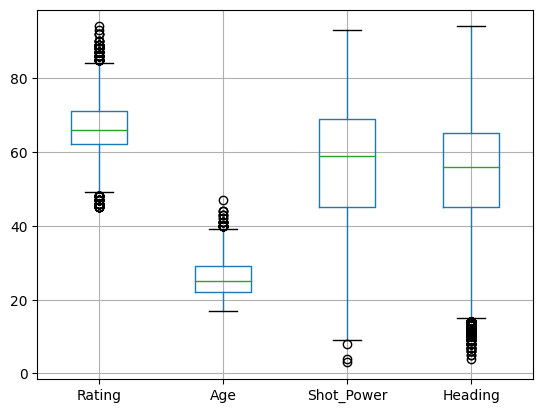

In [67]:
from pandas.core.reshape.encoding import DataFrame
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from scipy.stats import f_oneway
from scipy.stats import normaltest
from scipy.stats import bartlett
import scipy.stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

url= 'https://raw.githubusercontent.com/JesusContr/Mineria-de-datos/main/dataframe2.csv'
df= pd.read_csv(url)

df.info()

rating = df['Rating']
age = df['Age']
heading = df['Heading']
shot_Power = df['Shot_Power']

S,p = normaltest(rating)
alfa = 0.05
print('p = {:g}'.format(p))

if p<alfa:
    print('No se puede obtener la normalidad')
else:
    print('Se pudo obtener la normalidad')


S,p = normaltest(heading)
alfa = 0.05
print('p = {:g}'.format(p))

if p<alfa:
    print('No se puede obtener la normalidad')
else:
    print('Se pudo obtener la normalidad')

S,p = normaltest(shot_Power)
alfa = 0.05
print('p = {:g}'.format(p))

if p<alfa:
    print('No se puede obtener la normalidad')
else:
    print('Se pudo obtener la normalidad')

S,p = normaltest(age)
alfa = 0.05
print('p = {:g}'.format(p))

if p<alfa:
    print('No se puede obtener la normalidad')
else:
    print('Se pudo obtener la normalidad')


alfa = 0.05
Stat,p = bartlett(heading,rating,age,shot_Power)
print('p = {:g}'.format(p))
if p>alfa:
    print('Existe igualdad de varianza ')
else:
    print('No Existe igualdad de varianza')

Fc, p = f_oneway(age.values,rating.values,shot_Power.values,heading.values)

n=4-1
d=17588-4

F= scipy.stats.f.ppf(q=1-0.05, dfn=n, dfd=d)

if Fc < F:
    print('Fc = {:g}'.format(Fc), '<', 'F = {:g}'.format(F), 'p = {:g}'.format(p))
    print('No existen evidencias suficientes, por lo tanto no hay diferencias entre las medias')
else:
    print('Fc = {:g}'.format(Fc), '>=', 'F = {:g}'.format(F), 'p = {:g}'.format(p))
    print('Existen evidencias suficientes, por lo tanto al menos una media es igual')

    data = pd.DataFrame({'datos': np.concatenate([age.values,heading.values,heading.values, shot_Power.values]),
                   'factor':np.repeat(['age','heading','heading', 'shot_Power'],repeats=17588)})

    tukey = pairwise_tukeyhsd(endog=data['datos'],
                          groups=data['factor'],
                          alpha=0.05)
print(tukey)

df.boxplot(column=['Rating','Age','Shot_Power','Heading'])
plot.show()
